In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
hs = pd.read_excel("C:/Users/vishal/Desktop/aug10/Linear Regression.xlsx",sheet_name=0 )

In [3]:
hs.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [4]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [5]:
hs.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141905,367127.195968,75000.0,321950.00,450000.00,645000.0,7700000.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5


In [6]:
hs.isna().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

# Visualizing the data

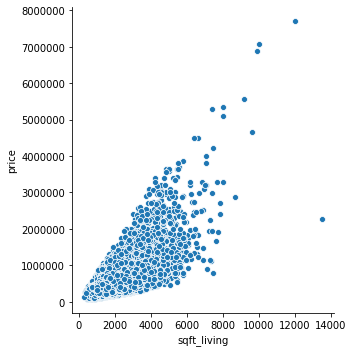

In [21]:
sb.relplot(x="sqft_living",y="price",data=hs)

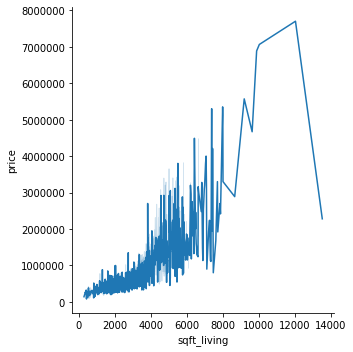

In [22]:
sb.relplot(x="sqft_living",y="price",kind="line",data=hs)

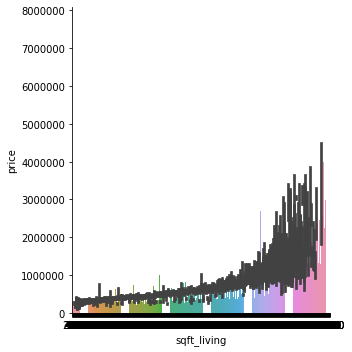

In [23]:
sb.catplot(x="sqft_living",y="price",kind="bar",data=hs)

# select the value of x and y

In [24]:
x = hs.iloc[:,1:2].values
y = hs.iloc[:,0:1].values

# split the train and test data

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [26]:
x_train.shape

(14480, 1)

In [27]:
y_train.shape

(14480, 1)

In [28]:
x_test.shape

(7133, 1)

In [29]:
y_test.shape

(7133, 1)

# model Building with sklearn¶

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [31]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred = lm.predict(x_test)

In [33]:
y_pred

array([[ 536194.59894823],
       [ 765613.63854729],
       [1006089.01740414],
       ...,
       [ 409046.69748369],
       [ 367585.42526699],
       [ 309539.64416362]])

In [34]:
lm.intercept_

array([-35970.9576422])

In [35]:
lm.coef_

array([[276.40848144]])

# estimate the cost

In [36]:
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r_square = r2_score(y_test,y_pred)
print("the rmse value is :",rmse)
print("the r_square value is :",r_square)

the rmse value is : 276975.1354773729
the r_square value is : 0.4876476260632342


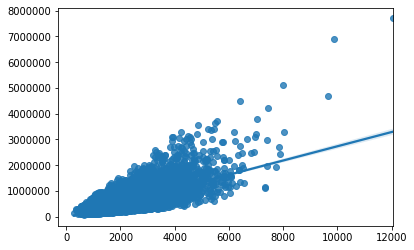

In [38]:
sb.regplot(x_train,y_train,data=hs)

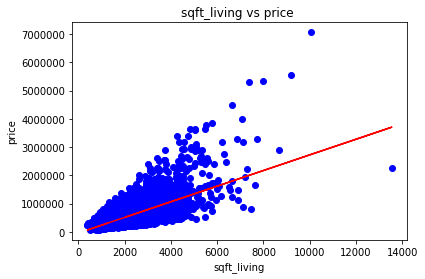

In [20]:
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_test,y_pred,color="red")
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title("sqft_living vs price ")
plt.show()